In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('clean_df.csv')

# Building stationary varibales


In [2]:
#build dummy varibale
df1['label'] = pd.cut(x=df1['tomorrow change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
df1['Dummy_label'] = df1['label'].map({'Decrease': 0, 'Increase': 1})
df1['Treasury'] = df1['10Y Treasury']
df1.set_index(['symbol_id'],inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]

In [3]:
    timeseries = df1['Dummy_label'].dropna()
    result = adfuller(timeseries)
    result
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1])

NameError: name 'adfuller' is not defined

In [4]:
dfDOGE = df1.loc['DOGE_74']
dfDOGE.set_index(['time_close'],inplace=True)
dfDOGE['Dummy_label'] = dfDOGE['Dummy_label'].astype(float)
dfDOGE.drop('label', axis=1, inplace=True)
dfDOGE.drop('10Y_Treasury', axis=1, inplace=True)
result=dfDOGE.dtypes
dfDOGE

/tmp/ipykernel_66732/2976369268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDOGE['Dummy_label'] = dfDOGE['Dummy_label'].astype(float)
/tmp/ipykernel_66732/2976369268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDOGE.drop('label', axis=1, inplace=True)
/tmp/ipykernel_66732/2976369268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDOGE.drop('10Y_Treasury',

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury
time_close,,,,,,,,,,,,,,,,,
2020-09-24,0.002575,8.478099e+07,3.254117e+08,9,24,3,1,-0.025248,-0.153101,0.021075,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666
2020-09-25,0.002629,1.120052e+08,3.323058e+08,9,25,4,1,0.021075,0.321112,0.027243,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659
2020-09-26,0.002701,1.237417e+08,3.413966e+08,9,26,5,0,0.027243,0.104786,0.007860,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659
2020-09-27,0.002722,1.060252e+08,3.441176e+08,9,27,6,0,0.007860,-0.143173,0.005012,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659
2020-09-28,0.002736,7.818546e+07,3.458797e+08,9,28,0,1,0.005012,-0.262577,-0.022978,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.060484,2.764186e+08,8.024411e+09,9,29,3,1,-0.003809,-0.174360,0.002384,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747
2022-09-30,0.060628,2.334081e+08,8.043540e+09,9,30,4,1,0.002384,-0.155599,0.028931,357.179993,31.620001,1662.400024,79.489998,0.982956,1.0,3.804
2022-10-01,0.062382,4.007635e+08,8.276249e+09,10,1,5,0,0.028931,0.717008,-0.027036,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804


In [5]:
dfXMR = df1.loc['XMR_328']
dfXMR.set_index(['time_close'],inplace=True)
dfXMR['Dummy_label'] = dfXMR['Dummy_label'].astype(float)
dfXMR['XMR_Dummy'] = dfXMR['Dummy_label']
dfXMR.drop('label', axis=1, inplace=True)
dfXMR.drop('10Y_Treasury', axis=1, inplace=True)
dfXMR['XMR_close'] = dfXMR['close']
dfXMR.drop('close', axis=1, inplace=True)
result=dfXMR.dtypes
dfXMR

/tmp/ipykernel_66732/210386176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXMR['Dummy_label'] = dfXMR['Dummy_label'].astype(float)
/tmp/ipykernel_66732/210386176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXMR['XMR_Dummy'] = dfXMR['Dummy_label']
/tmp/ipykernel_66732/210386176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,XMR_Dummy,XMR_close
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,1.0,88.404357
2020-09-25,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,91.695987
2020-09-26,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,93.026053
2020-09-27,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,95.044383
2020-09-28,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.0,97.741001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,1.0,146.795038
2022-09-30,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,148.238784
2022-10-01,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,147.036460


In [6]:
dfXLM = df1.loc['XLM_512']
dfXLM.set_index(['time_close'],inplace=True)
dfXLM['Dummy_label'] = dfXLM['Dummy_label'].astype(float)
dfXLM['XLM_Dummy'] = dfXLM['Dummy_label']
dfXLM.drop('label', axis=1, inplace=True)
dfXLM.drop('10Y_Treasury', axis=1, inplace=True)
dfXLM['XLM_close'] = dfXLM['close']
dfXLM.drop('close', axis=1, inplace=True)
result=dfXLM.dtypes
dfXLM

/tmp/ipykernel_66732/1911079629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXLM['Dummy_label'] = dfXLM['Dummy_label'].astype(float)
/tmp/ipykernel_66732/1911079629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXLM['XLM_Dummy'] = dfXLM['Dummy_label']
/tmp/ipykernel_66732/1911079629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,XLM_Dummy,XLM_close
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,0.130112,0.023188,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,1.0,0.068613
2020-09-25,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,0.153256,0.066801,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,0.070204
2020-09-26,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,0.211185,-0.010805,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.0,0.074894
2020-09-27,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,-0.295592,-0.000851,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.0,0.074085
2020-09-28,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,-0.005278,-0.003863,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.0,0.074022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,-0.060907,0.053767,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,1.0,0.108473
2022-09-30,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,0.420765,0.001370,357.179993,31.620001,1662.400024,79.489998,0.982956,1.0,3.804,1.0,0.114305
2022-10-01,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,-0.147152,0.058336,357.179993,31.620001,1662.400024,79.489998,0.982956,1.0,3.804,1.0,0.114461


In [7]:
dfXRP = df1.loc['XRP_52']
dfXRP.set_index(['time_close'],inplace=True)
dfXRP['Dummy_label'] = dfXRP['Dummy_label'].astype(float)
dfXRP['XRP_Dummy'] = dfXRP['Dummy_label']
dfXRP.drop('label', axis=1, inplace=True)
dfXRP.drop('10Y_Treasury', axis=1, inplace=True)
dfXRP['XRP_close'] = dfXRP['close']
dfXRP.drop('close', axis=1, inplace=True)
result=dfXRP.dtypes
dfXRP

/tmp/ipykernel_66732/3215780434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXRP['Dummy_label'] = dfXRP['Dummy_label'].astype(float)
/tmp/ipykernel_66732/3215780434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXRP['XRP_Dummy'] = dfXRP['Dummy_label']
/tmp/ipykernel_66732/3215780434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,XRP_Dummy,XRP_close
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,1.676911e+09,1.005329e+10,9,24,3,1,-0.045198,-0.050177,0.040102,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,1.0,0.222924
2020-09-25,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,0.231864
2020-09-26,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.0,0.243233
2020-09-27,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,0.243122
2020-09-28,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.0,0.244379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,2.661456e+09,2.233421e+10,9,29,3,1,0.004518,-0.044092,0.073597,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,1.0,0.447573
2022-09-30,3.505904e+09,2.397795e+10,9,30,4,1,0.073597,0.317288,-0.010923,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,0.480514
2022-10-01,1.032952e+10,2.371604e+10,10,1,5,0,-0.010923,1.946322,-0.000385,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,0.475265


In [8]:
dfBTC = df1.loc['BTC_1']
dfBTC.set_index(['time_close'],inplace=True)
dfBTC['Dummy_label'] = dfBTC['Dummy_label'].astype(float)
dfBTC['BTC_Dummy'] = dfBTC['Dummy_label']
dfBTC.drop('label', axis=1, inplace=True)
dfBTC.drop('10Y_Treasury', axis=1, inplace=True)
dfBTC['BTC_close'] = dfBTC['close']
dfBTC.drop('close', axis=1, inplace=True)
result=dfBTC.dtypes
dfBTC

/tmp/ipykernel_66732/1224892515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC['Dummy_label'] = dfBTC['Dummy_label'].astype(float)
/tmp/ipykernel_66732/1224892515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC['BTC_Dummy'] = dfBTC['Dummy_label']
/tmp/ipykernel_66732/1224892515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,BTC_Dummy,BTC_close
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,2.422745e+10,1.904390e+11,9,24,3,1,-0.021312,0.018214,0.046477,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,1.0,10295.054804
2020-09-25,4.394135e+10,1.992993e+11,9,25,4,1,0.046477,0.813701,-0.009782,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.0,10773.534000
2020-09-26,3.927767e+10,1.973608e+11,9,26,5,0,-0.009782,-0.106134,0.009511,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,10668.141934
2020-09-27,4.710672e+10,1.992481e+11,9,27,6,0,0.009511,0.199326,0.010435,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,10769.604523
2020-09-28,5.502327e+10,2.013376e+11,9,28,0,1,0.010435,0.168056,-0.014901,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.0,10881.984006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,5.264416e+10,3.726338e+11,9,29,3,1,0.017353,-0.094970,0.004500,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,1.0,19445.124438
2022-09-30,4.161615e+10,3.743283e+11,9,30,4,1,0.004500,-0.209482,-0.006790,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,19532.627889
2022-10-01,4.274283e+10,3.718069e+11,10,1,5,0,-0.006790,0.027073,-0.005695,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,19400.000434


In [9]:
dfETH = df1.loc['ETH_1027']
dfETH.set_index(['time_close'],inplace=True)
dfETH['Dummy_label'] = dfETH['Dummy_label'].astype(float)
dfETH['ETH_Dummy'] = dfETH['Dummy_label']
dfETH.drop('label', axis=1, inplace=True)
dfETH.drop('10Y_Treasury', axis=1, inplace=True)
dfETH['ETH_close'] = dfETH['close']
dfETH.drop('close', axis=1, inplace=True)
result=dfETH.dtypes
dfETH

/tmp/ipykernel_66732/4042953961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH['Dummy_label'] = dfETH['Dummy_label'].astype(float)
/tmp/ipykernel_66732/4042953961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH['ETH_Dummy'] = dfETH['Dummy_label']
/tmp/ipykernel_66732/4042953961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,Gold,Oil,EUR_USD,Dummy_label,Treasury,ETH_Dummy,ETH_close
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,1.406652e+10,3.638855e+10,9,24,3,1,-0.059389,-0.001510,0.078154,314.251007,28.510000,1868.300049,40.310001,1.165854,1.0,0.666,1.0,322.801017
2020-09-25,1.531143e+10,3.923720e+10,9,25,4,1,0.078154,0.088501,0.010122,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,348.029329
2020-09-26,1.362715e+10,3.963910e+10,9,26,5,0,0.010122,-0.110002,0.021704,319.331482,26.379999,1857.699951,40.250000,1.167324,1.0,0.659,1.0,351.552190
2020-09-27,1.245056e+10,4.050423e+10,9,27,6,0,0.021704,-0.086342,-0.002503,319.331482,26.379999,1857.699951,40.250000,1.167324,0.0,0.659,0.0,359.182175
2020-09-28,1.363118e+10,4.040762e+10,9,28,0,1,-0.002503,0.094825,-0.008407,324.635376,26.190001,1872.800049,40.599998,1.163535,0.0,0.663,0.0,358.283277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,1.884855e+10,1.635036e+11,9,29,3,1,0.000887,0.064061,0.002108,362.790009,31.840000,1658.500000,81.230003,0.970817,1.0,3.747,1.0,1333.964086
2022-09-30,1.412469e+10,1.638675e+11,9,30,4,1,0.002108,-0.250622,-0.006693,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,1336.776474
2022-10-01,1.365689e+10,1.627897e+11,10,1,5,0,-0.006693,-0.033120,-0.012576,357.179993,31.620001,1662.400024,79.489998,0.982956,0.0,3.804,0.0,1327.829013


In [10]:
dfcoin = pd. concat([dfDOGE, dfXMR['XMR_Dummy'], dfXLM['XLM_Dummy'], dfXRP['XRP_Dummy'], dfBTC['BTC_Dummy'], dfETH['ETH_Dummy']], axis = 1)

In [11]:
dfcoin

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,Gold,Oil,EUR_USD,Dummy_label,Treasury,XMR_Dummy,XLM_Dummy,XRP_Dummy,BTC_Dummy,ETH_Dummy
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.002575,8.478099e+07,3.254117e+08,9,24,3,1,-0.025248,-0.153101,0.021075,...,1868.300049,40.310001,1.165854,1.0,0.666,1.0,1.0,1.0,1.0,1.0
2020-09-25,0.002629,1.120052e+08,3.323058e+08,9,25,4,1,0.021075,0.321112,0.027243,...,1857.699951,40.250000,1.167324,1.0,0.659,1.0,1.0,1.0,0.0,1.0
2020-09-26,0.002701,1.237417e+08,3.413966e+08,9,26,5,0,0.027243,0.104786,0.007860,...,1857.699951,40.250000,1.167324,1.0,0.659,1.0,0.0,0.0,1.0,1.0
2020-09-27,0.002722,1.060252e+08,3.441176e+08,9,27,6,0,0.007860,-0.143173,0.005012,...,1857.699951,40.250000,1.167324,1.0,0.659,1.0,0.0,1.0,1.0,0.0
2020-09-28,0.002736,7.818546e+07,3.458797e+08,9,28,0,1,0.005012,-0.262577,-0.022978,...,1872.800049,40.599998,1.163535,0.0,0.663,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.060484,2.764186e+08,8.024411e+09,9,29,3,1,-0.003809,-0.174360,0.002384,...,1658.500000,81.230003,0.970817,1.0,3.747,1.0,1.0,1.0,1.0,1.0
2022-09-30,0.060628,2.334081e+08,8.043540e+09,9,30,4,1,0.002384,-0.155599,0.028931,...,1662.400024,79.489998,0.982956,1.0,3.804,0.0,1.0,0.0,0.0,0.0
2022-10-01,0.062382,4.007635e+08,8.276249e+09,10,1,5,0,0.028931,0.717008,-0.027036,...,1662.400024,79.489998,0.982956,0.0,3.804,0.0,1.0,0.0,0.0,0.0


In [41]:
#Use percentage change for nonstationary variables
dfcoin['volume_change']=dfcoin['volume'].pct_change()
dfcoin['VIX_change']=dfcoin['VIX'].pct_change()
dfcoin['SPY_change']=dfcoin['SPY'].pct_change()
dfcoin['Gold_change']=dfcoin['Gold'].pct_change()
dfcoin['Oil_change']=dfcoin['Oil'].pct_change()
dfcoin['EUR_USD_change']=dfcoin['EUR_USD'].pct_change()

dfcoin['S_Dummy'] = pd.cut(x=dfcoin['SPY_change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
dfcoin['SPY_Dummy'] = dfcoin['S_Dummy'].map({'Decrease': 0, 'Increase': 1})
dfcoin.drop('S_Dummy', axis=1, inplace=True)

dfcoin['v_Dummy'] = pd.cut(x=dfcoin['VIX_change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
dfcoin['VIX_Dummy'] = dfcoin['v_Dummy'].map({'Decrease': 0, 'Increase': 1})
dfcoin.drop('v_Dummy', axis=1, inplace=True)


dfcoin['V_Dummy'] = pd.cut(x=dfcoin['volume_change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
dfcoin['volume_Dummy'] = dfcoin['V_Dummy'].map({'Decrease': 0, 'Increase': 1})
dfcoin.drop('V_Dummy', axis=1, inplace=True)

dfcoin['G_Dummy'] = pd.cut(x=dfcoin['Gold_change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
dfcoin['Gold_Dummy'] = dfcoin['G_Dummy'].map({'Decrease': 0, 'Increase': 1})
dfcoin.drop('G_Dummy', axis=1, inplace=True)

dfcoin['O_Dummy'] = pd.cut(x=dfcoin['Oil_change'], bins=[-10,0,10], labels=('Decrease', 'Increase'))
dfcoin['Oil_Dummy'] = dfcoin['O_Dummy'].map({'Decrease': 0, 'Increase': 1})
dfcoin.drop('O_Dummy', axis=1, inplace=True)

In [43]:
dfcoin.drop(dfcoin.head(1).index, inplace=True) 
dfcoin['SPY_Dummy'] = dfcoin['SPY_Dummy'].astype(float)
dfcoin['volume_Dummy'] = dfcoin['volume_Dummy'].astype(float)
dfcoin['Gold_Dummy'] = dfcoin['Gold_Dummy'].astype(float)
dfcoin['Oil_Dummy'] = dfcoin['Oil_Dummy'].astype(float)
dfcoin['VIX_Dummy'] = dfcoin['VIX_Dummy'].astype(float)

ADF Statistic: -27.722793
p-value: 0.000000


ADF Statistic: -18.079949
p-value: 0.000000


ADF Statistic: -4.419788
p-value: 0.000274


ADF Statistic: -6.714467
p-value: 0.000000


ADF Statistic: -5.609867
p-value: 0.000001


ADF Statistic: -6.737926
p-value: 0.000000


ADF Statistic: -27.686443
p-value: 0.000000


ADF Statistic: -27.223224
p-value: 0.000000


ADF Statistic: -27.465169
p-value: 0.000000


ADF Statistic: -25.733979
p-value: 0.000000


ADF Statistic: -14.066967
p-value: 0.000000




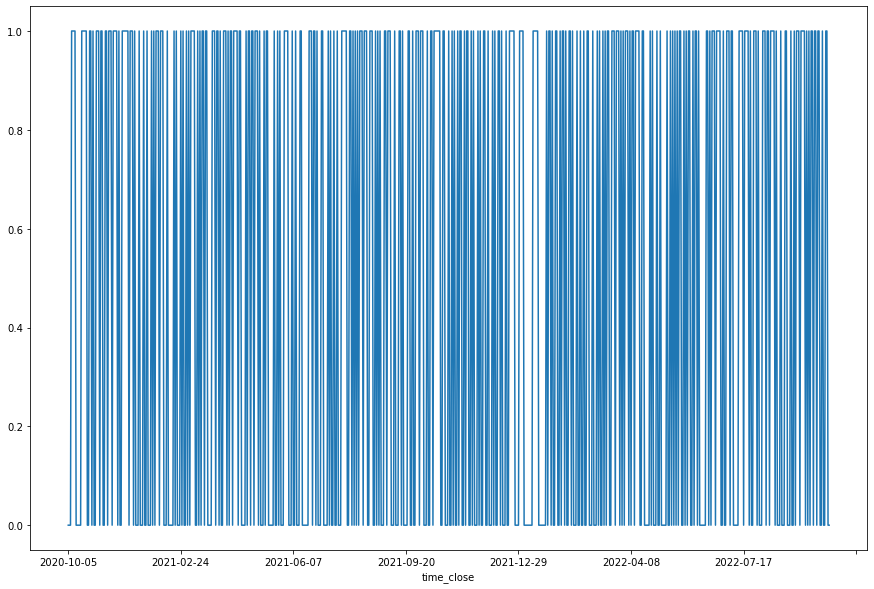

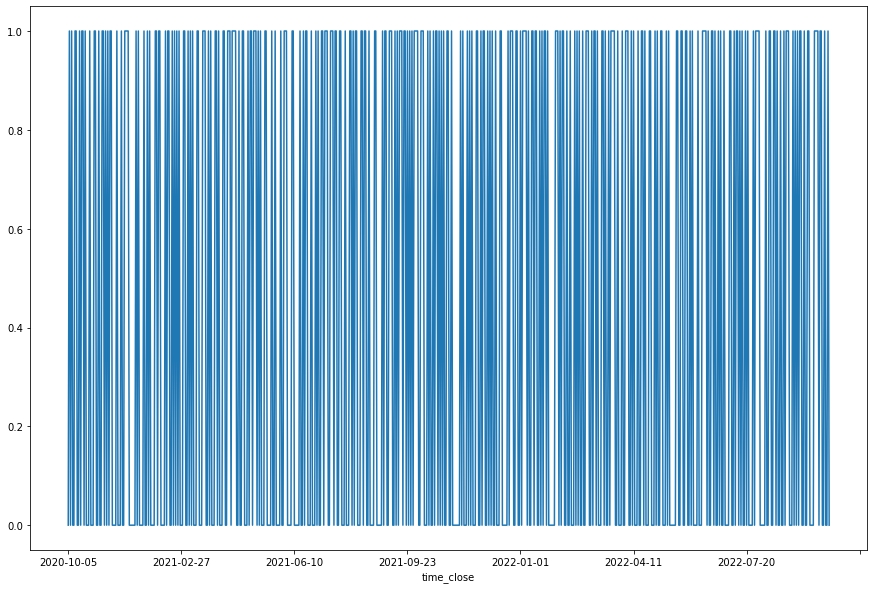

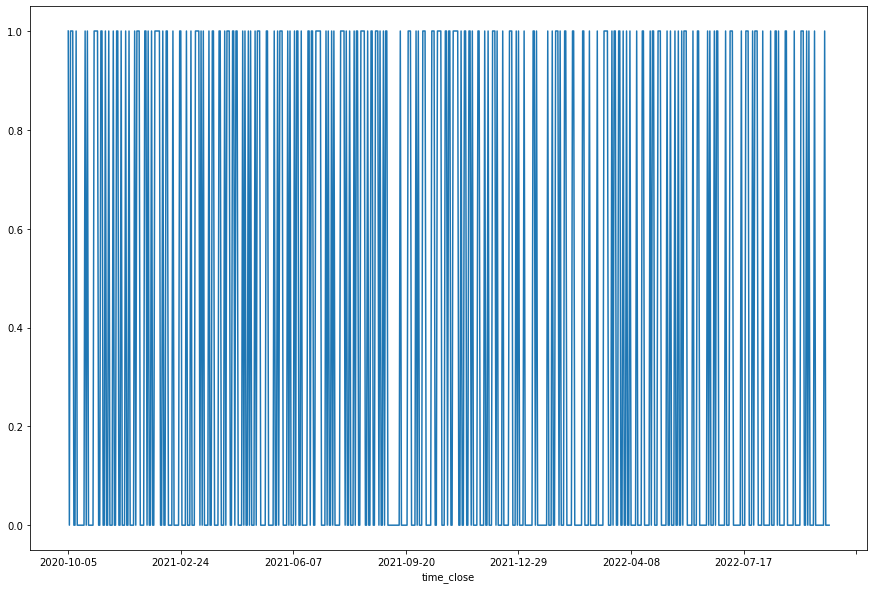

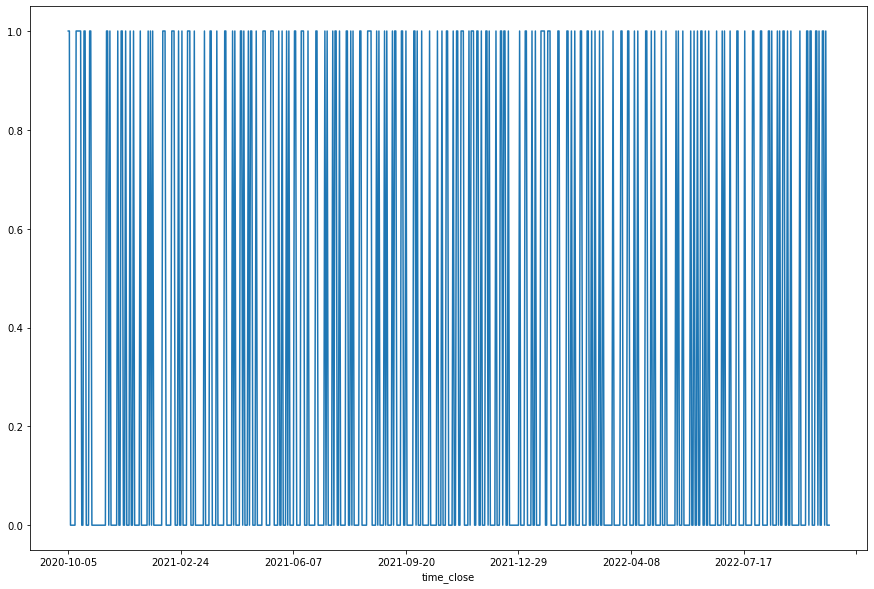

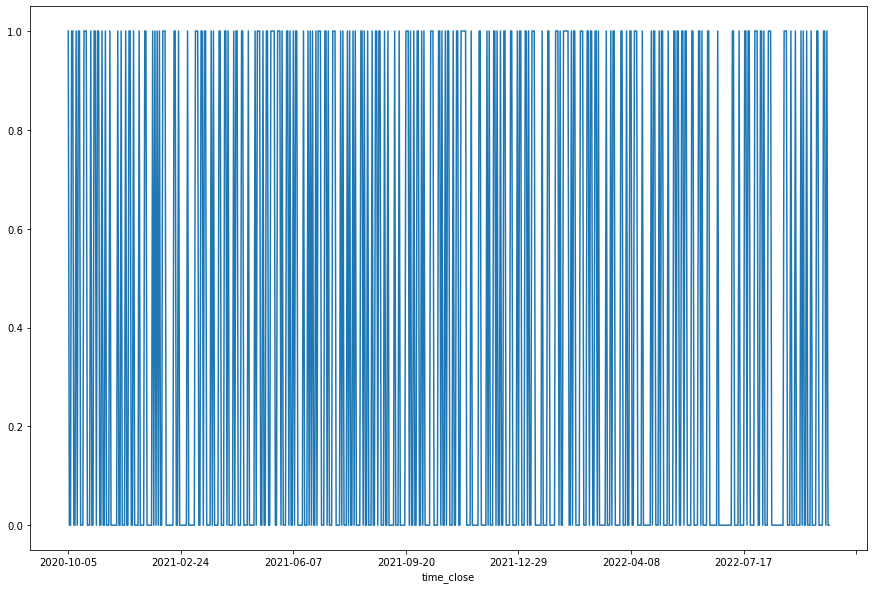

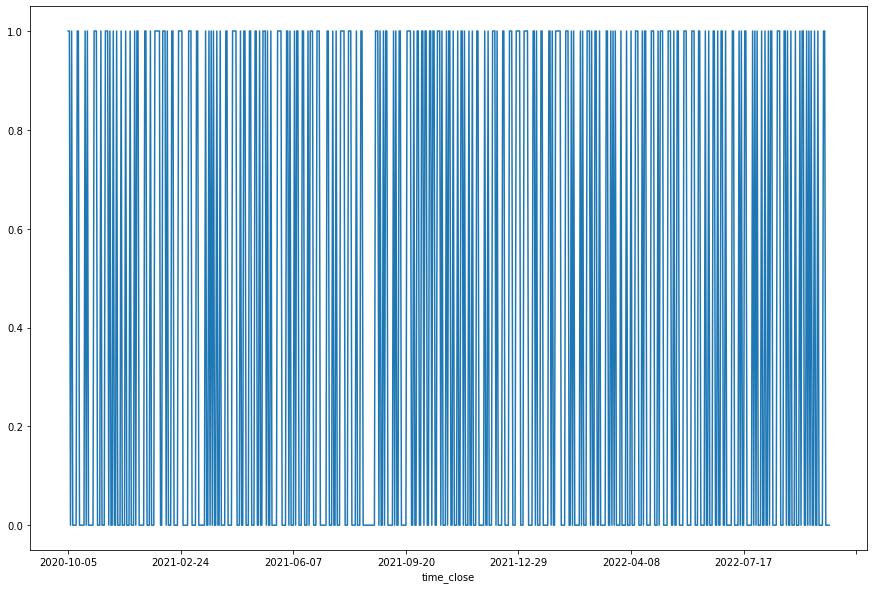

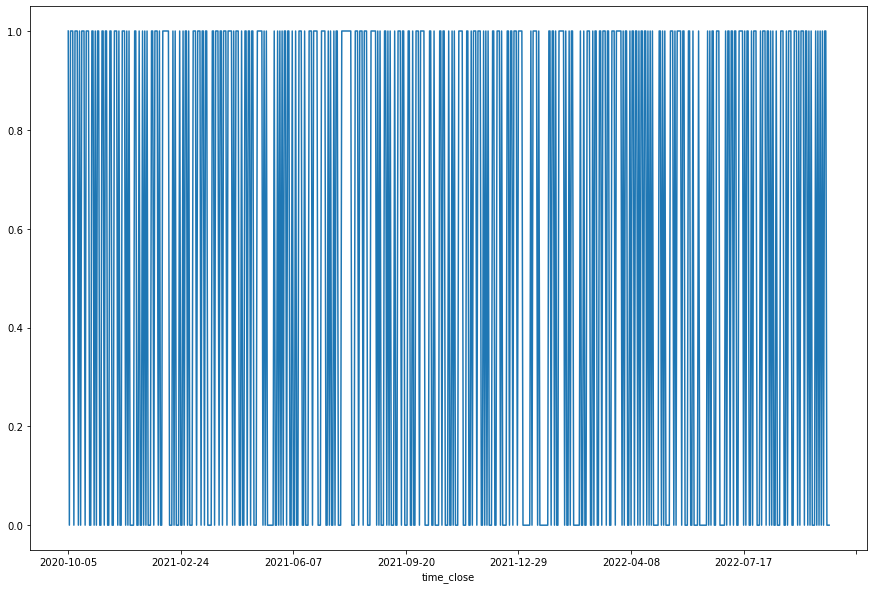

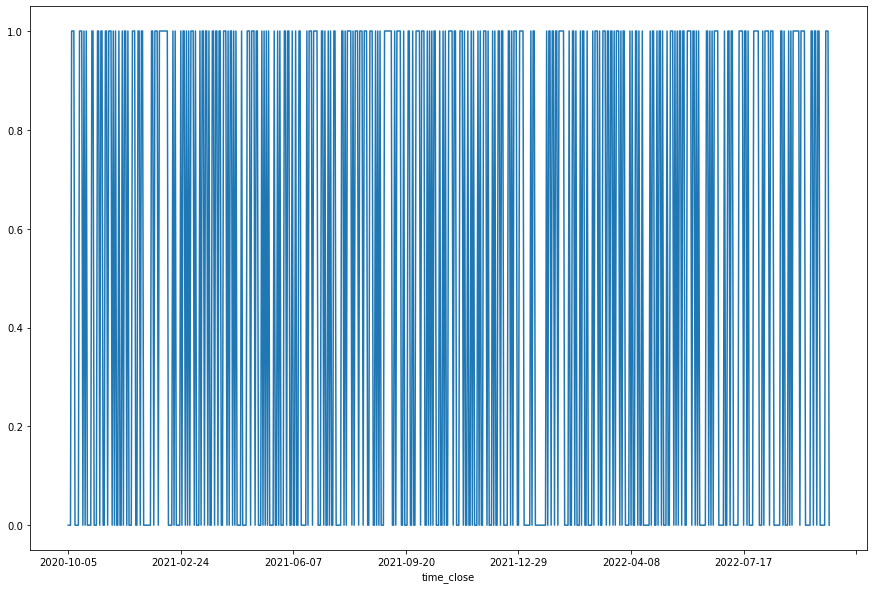

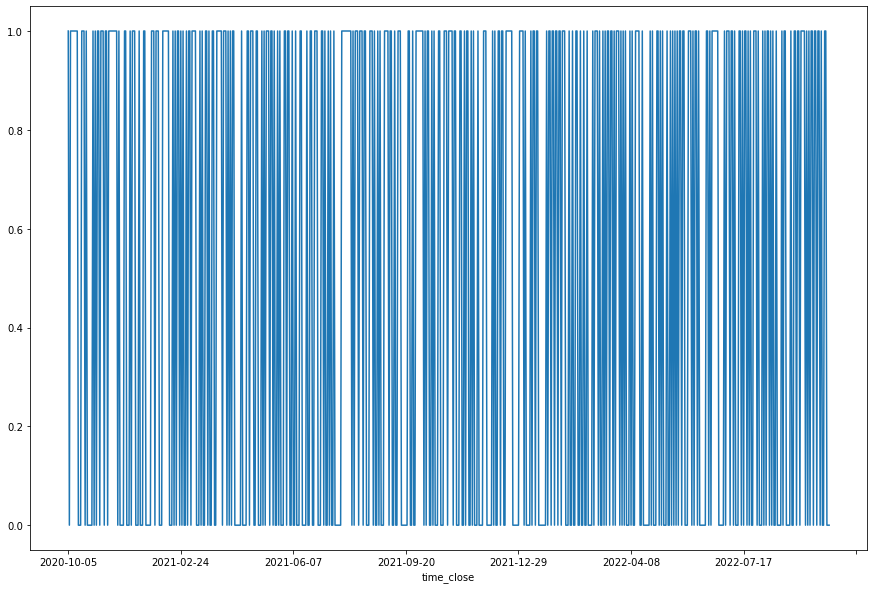

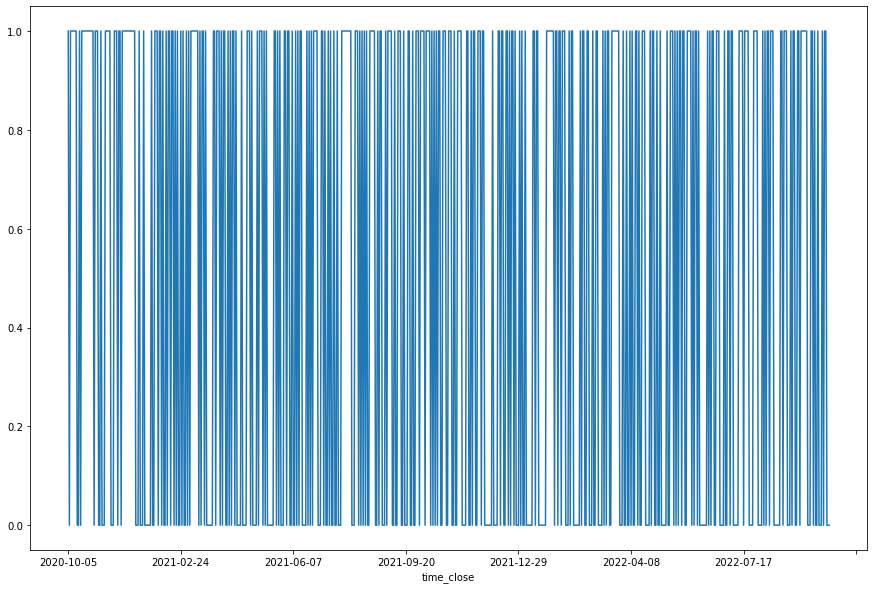

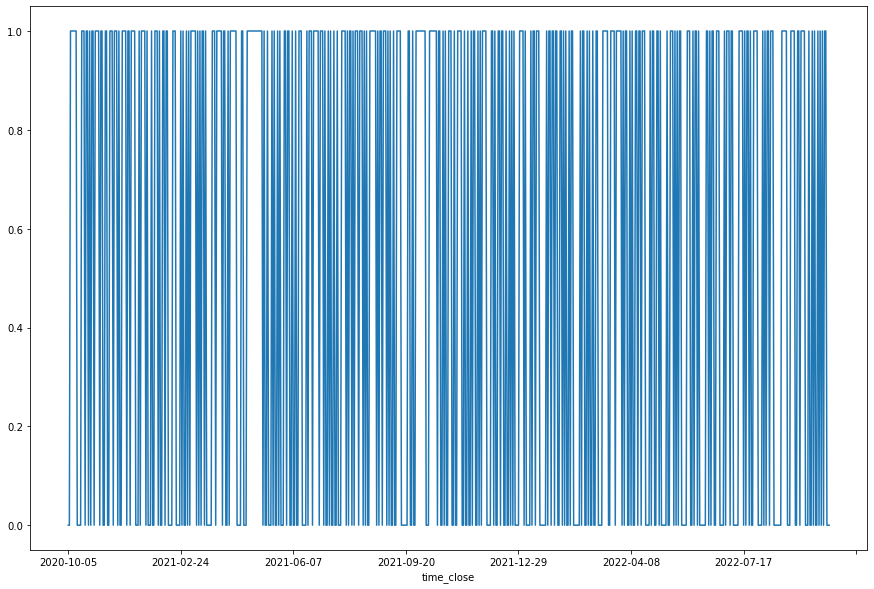

In [44]:
from statsmodels.tsa.stattools import adfuller
List=['Dummy_label','volume_Dummy','SPY_Dummy', 'VIX_Dummy', 'Gold_Dummy', 'Oil_Dummy','XMR_Dummy','XLM_Dummy','XRP_Dummy','BTC_Dummy','ETH_Dummy']
for i in List:
    timeseries = dfcoin[i].dropna()
    result = adfuller(timeseries)
    plt.figure(figsize=(15, 10))
    ax = timeseries.plot(secondary_y=False, logy=False)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')



# Linear Regression
    1. close(return) with 'yesterday_close_price'(testerday return),'volumn', 'XMR_close', 'XLM_close', 'XRP_close', 'BTC_close', 'ETH_close'
    
    
  

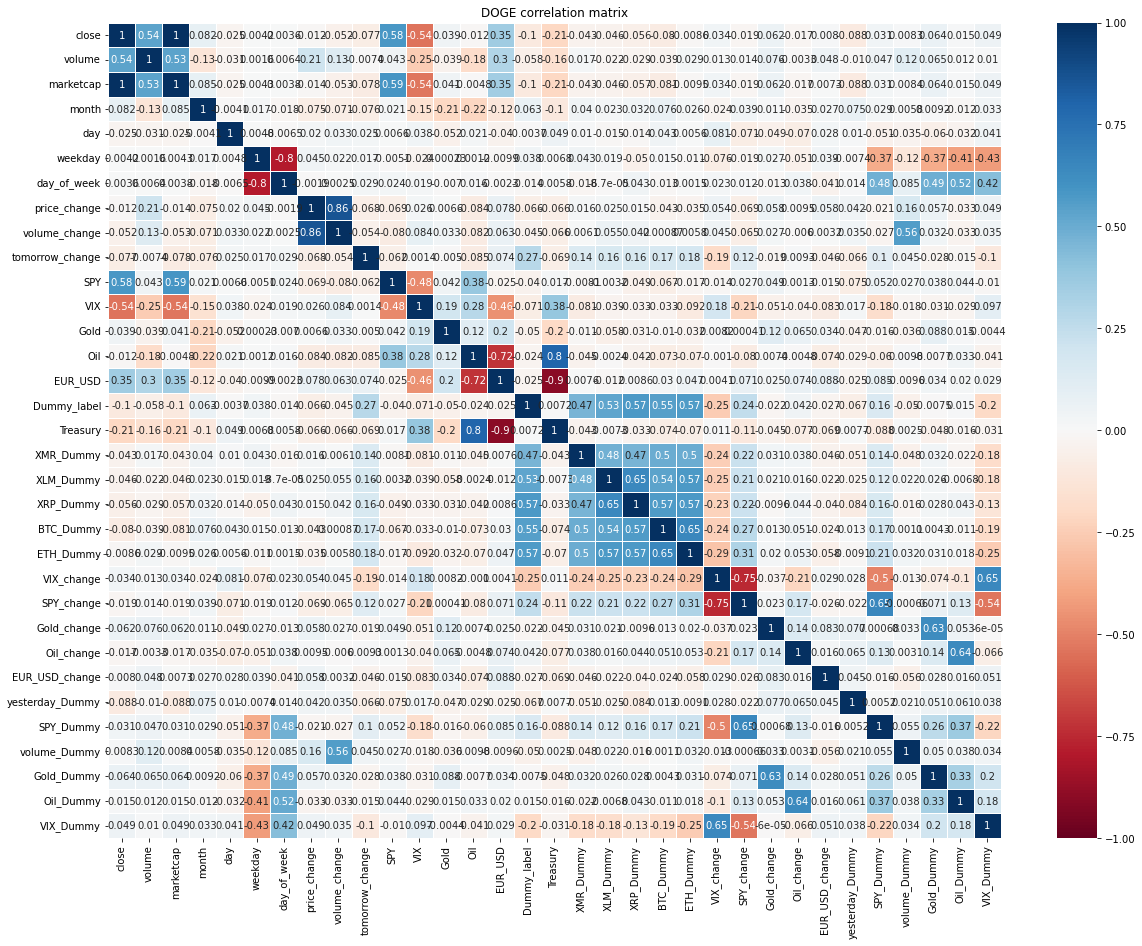

In [45]:
#correlation plot
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = dfcoin.corr()
sns.heatmap(corrmat,cmap="RdBu",linewidths=.5,  vmin=-1, vmax=1, annot=True)
plt.title('DOGE correlation matrix')
plt.show()

# Linear Regression with Time Series


In [55]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

dfcoin['yesterday_Dummy'] = dfcoin['Dummy_label'].shift(-1)
dfcoin.drop(dfcoin.tail(1).index, inplace=True) 

X = dfcoin[['Dummy_label','yesterday_Dummy','XMR_Dummy','XLM_Dummy','XRP_Dummy','BTC_Dummy','ETH_Dummy','VIX_Dummy','SPY_Dummy']]
y = X.pop('Dummy_label')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=4, shuffle=False)
X_train

,yesterday_Dummy,XMR_Dummy,XLM_Dummy,XRP_Dummy,BTC_Dummy,ETH_Dummy,VIX_Dummy,SPY_Dummy
time_close,,,,,,,,
2020-10-05,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2020-10-06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-10-07,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2020-10-08,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2020-10-09,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-13,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [56]:
y_train

time_close
2020-10-05    0.0
2020-10-06    0.0
2020-10-07    0.0
2020-10-08    1.0
2020-10-09    1.0
             ... 
2022-05-11    0.0
2022-05-12    0.0
2022-05-13    1.0
2022-05-14    0.0
2022-05-15    1.0
Name: Dummy_label, Length: 538, dtype: float64

In [60]:
#Scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
scaler = StandardScaler()
X5 = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X5
X6 = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X6

,yesterday_Dummy,XMR_Dummy,XLM_Dummy,XRP_Dummy,BTC_Dummy,ETH_Dummy,VIX_Dummy,SPY_Dummy
0,1.045651,-1.061359,-0.981582,-0.992592,-1.018763,-1.093581,-0.665101,-0.781523
1,-0.956342,0.942189,1.018763,1.007463,0.981582,0.914427,-0.665101,1.279553
2,1.045651,-1.061359,-0.981582,-0.992592,-1.018763,-1.093581,1.503531,-0.781523
3,-0.956342,0.942189,1.018763,1.007463,0.981582,0.914427,-0.665101,-0.781523
4,1.045651,0.942189,-0.981582,-0.992592,-1.018763,-1.093581,1.503531,1.279553
...,...,...,...,...,...,...,...,...
130,-0.956342,0.942189,-0.981582,-0.992592,-1.018763,0.914427,-0.665101,-0.781523
131,1.045651,-1.061359,-0.981582,1.007463,-1.018763,-1.093581,-0.665101,-0.781523
132,-0.956342,0.942189,-0.981582,-0.992592,0.981582,0.914427,1.503531,-0.781523
133,-0.956342,-1.061359,-0.981582,-0.992592,-1.018763,-1.093581,1.503531,-0.781523


In [66]:
#Linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
logisticRegr = LogisticRegression()
model = logisticRegr.fit(X5, y_train)
y_pred2=logisticRegr.predict(X6)
score = logisticRegr.score(X6, y_test)
print(score)


0.8222222222222222
